In [1]:
%matplotlib inline

# Terminación de caras con estimadores de salida múltiple

Este ejemplo muestra el uso de un estimador de salida múltiple para completar imágenes.
El objetivo es predecir la mitad inferior de una cara dada su mitad superior.

La primera columna de imágenes muestra rostros reales. Las siguientes columnas ilustran
cómo árboles extremadamente aleatorios, k vecinos más cercanos, lineales
la regresión y la regresión de la cresta completan la mitad inferior de esas caras.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import RANSACRegressor


In [3]:
# Cargue los conjuntos de datos de caras
data, targets = fetch_olivetti_faces(return_X_y=True)

print(data.shape)
data

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
(400, 4096)


array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [4]:
print(targets.shape)
targets

(400,)


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [5]:
train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

In [6]:
print(train.shape)
print(test.shape)

(300, 4096)
(100, 4096)


In [7]:
# Test on a subset of people
n_faces = 5
rng = check_random_state(5)
face_ids = rng.randint(test.shape[0], size=(n_faces,))
test = test[face_ids, :]
print(test.shape)
test

(5, 4096)


array([[0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752],
       [0.13636364, 0.10743801, 0.09090909, ..., 0.446281  , 0.47107437,
        0.45454547],
       [0.3429752 , 0.28512397, 0.70247936, ..., 0.18181819, 0.21900827,
        0.19421488],
       [0.77272725, 0.8057851 , 0.79752064, ..., 0.2107438 , 0.19008264,
        0.13636364],
       [0.13636364, 0.23966943, 0.3429752 , ..., 0.29338843, 0.28512397,
        0.26859504]], dtype=float32)

In [8]:
n_pixels = data.shape[1]     #4096
# Mitad superior de las caras
X_train = train[:, : (n_pixels + 1) // 2]
# Mitad inferior de las carases
y_train = train[:, n_pixels // 2 :]
X_test = test[:, : (n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2 :]


In [9]:
# Fit estimators     TODOS REGRESORES
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(
        n_estimators=10, max_features=32, random_state=0
    ),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "Robust regression": RANSACRegressor(min_samples=200)}
ESTIMATORS

{'Extra trees': ExtraTreesRegressor(max_features=32, n_estimators=10, random_state=0),
 'K-nn': KNeighborsRegressor(),
 'Linear regression': LinearRegression(),
 'Ridge': RidgeCV(),
 'Robust regression': RANSACRegressor(min_samples=200)}

In [10]:
# Creamos un nuevo diccionario para guardar los resultados
y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    # Entrenmos el modelo
    estimator.fit(X_train, y_train)
    # Guardamos el resultado
    y_test_predict[name] = estimator.predict(X_test)


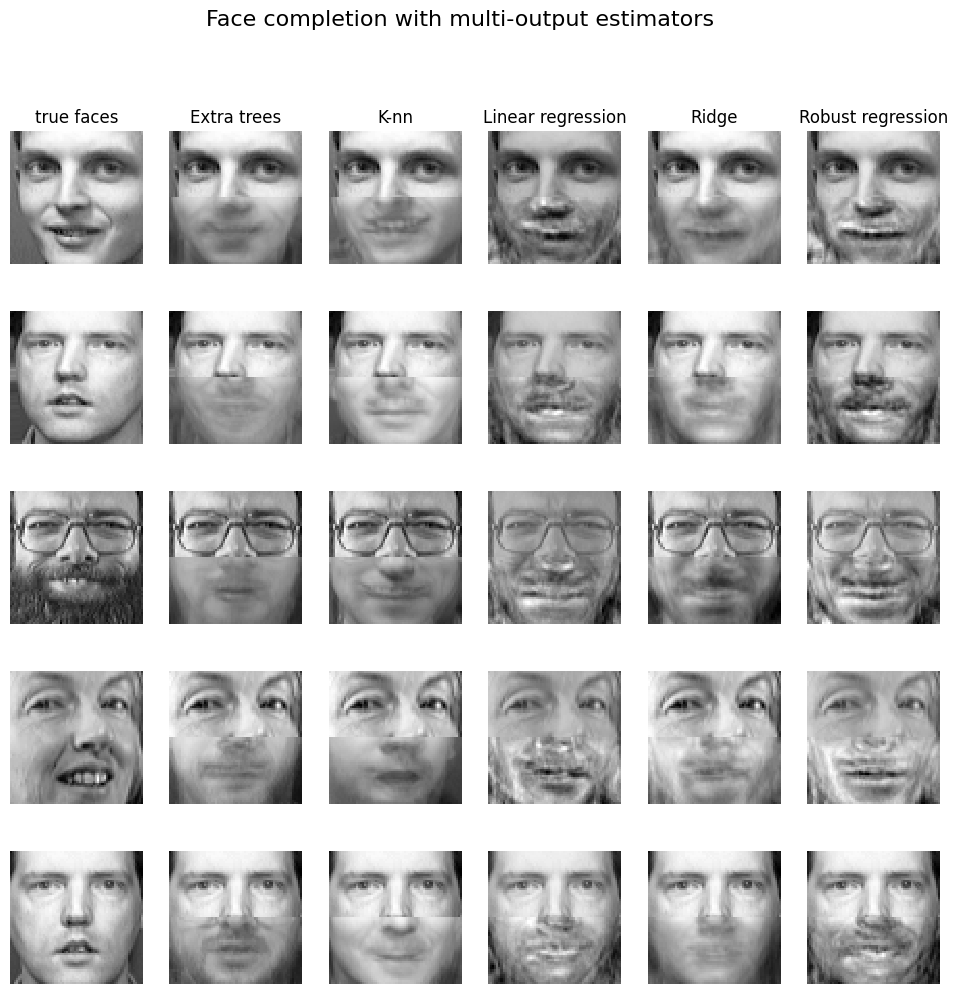

In [11]:
# Graficar las caras completas

# Definimos las dimensiones de las imagenes
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
# Definimos el taño del grafico
plt.figure(figsize=(2.0 * n_cols, 2.26 * n_faces))
# Titulo del grafico
plt.suptitle("Face completion with multi-output estimators", size=16)

# Hacemos un bucle por cada una de las caras de testeo
for i in range(n_faces):
    # Tomamos la cara real
    true_face = np.hstack((X_test[i], y_test[i]))

    # colocamos las caras en el grafico
    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    # Restauramos las imagenes/Pixels a su forma original
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        # completed_face = cara generada
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        # Colocamos las caras generadas en el grafico
        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        # Restauramos las imagenes/Pixels a su forma original
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

plt.show()